# Table of Contents
 <p><div class="lev1 toc-item"><a href="#A-short-study-of-Rényi-entropy" data-toc-modified-id="A-short-study-of-Rényi-entropy-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>A short study of Rényi entropy</a></div><div class="lev2 toc-item"><a href="#Requirements" data-toc-modified-id="Requirements-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Requirements</a></div><div class="lev2 toc-item"><a href="#Utility-functions" data-toc-modified-id="Utility-functions-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Utility functions</a></div><div class="lev2 toc-item"><a href="#Definition,-common-and-special-cases" data-toc-modified-id="Definition,-common-and-special-cases-13"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Definition, common and special cases</a></div><div class="lev2 toc-item"><a href="#Plotting-some-values" data-toc-modified-id="Plotting-some-values-14"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Plotting some values</a></div><div class="lev2 toc-item"><a href="#Conclusion" data-toc-modified-id="Conclusion-15"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Conclusion</a></div>

# A short study of Rényi entropy

I want to study here the Rényi entropy, using [Python](https://www.python.org/).
I will define a function implementing $H_{\alpha}(X)$, from the given formula, for discrete random variables, and check the influence of the parameter $\alpha$,
$$ H_{\alpha}(X) := \frac{1}{1-\alpha} \log_2(\sum_i^n p_i^{\alpha}),$$
where $X$ has $n$ possible values, and the $i$-th outcome has probability $p_i\in[0,1]$.

- *Reference*: [this blog post by John D. Cook](https://www.johndcook.com/blog/2018/11/21/renyi-entropy/), [this Wikipédia page](https://en.wikipedia.org/wiki/R%C3%A9nyi_entropy) and [this page on MathWorld](http://mathworld.wolfram.com/RenyiEntropy.html),
- *Author*: [Lilian Besson](https://perso.crans.org/besson/)
- *License*: [MIT License](https://lbesson.mit-license.org/)
- *Date*: 22th of November, 2018

## Requirements

In [4]:
!pip install watermark matplotlib numpy

In [5]:
%load_ext watermark
%watermark -v -m -a "Lilian Besson" -g -p matplotlib,numpy

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Lilian Besson 

CPython 3.6.6
IPython 7.0.1

matplotlib 3.0.2
numpy 1.14.5

compiler   : GCC 8.0.1 20180414 (experimental) [trunk revision 259383
system     : Linux
release    : 4.15.0-38-generic
machine    : x86_64
processor  : x86_64
CPU cores  : 4
interpreter: 64bit
Git hash   : a119f96f2de5b449131a73b6c9861f26b2c0d3f8


In [7]:
import numpy as np
import matplotlib.pyplot as plt

----
## Utility functions

We start by giving three examples of such vectors $X=(p_i)_{1\leq i \leq n}$, a discrete probability distributions on $n$ values.

In [49]:
X1 = [0.25, 0.5, 0.25]
X2 = [0.1, 0.25, 0.3, 0.45]
X3 = [0, 0.5, 0.5]

X4 = np.full(100, 1/100)
X5 = np.full(1000, 1/1000)

X6 = np.arange(100, dtype=float)
X6 /= np.sum(X6)

We need a function to safely compute $x \mapsto x \log_2(x)$, with special care in case $x=0$. This one will accept a numpy array or a single value as argument:

In [50]:
np.seterr(all="ignore")

{'divide': 'ignore', 'over': 'ignore', 'under': 'ignore', 'invalid': 'ignore'}

In [51]:
def x_log2_x(x):
    """ Return x * log2(x) and 0 if x is 0."""
    results = x * np.log2(x)
    if np.size(x) == 1:
        if np.isclose(x, 0.0):
            results = 0.0
    else:
        results[np.isclose(x, 0.0)] = 0.0
    return results

For examples:

In [52]:
x_log2_x(0)
x_log2_x(0.5)
x_log2_x(1)
x_log2_x(2)
x_log2_x(10)

0.0

-0.5

0.0

2.0

33.219280948873624

and with vectors, slots with $p_i=0$ are handled without error:

In [54]:
x_log2_x(X1)
x_log2_x(X2)
x_log2_x(X3)

x_log2_x(X4)[:10]
x_log2_x(X5)[:10]
x_log2_x(X6)[:10]

array([-0.5, -0.5, -0.5])

array([-0.33219281, -0.5       , -0.52108968, -0.51840139])

array([ 0. , -0.5, -0.5])

array([-0.06643856, -0.06643856, -0.06643856, -0.06643856, -0.06643856,
       -0.06643856, -0.06643856, -0.06643856, -0.06643856, -0.06643856])

array([-0.00996578, -0.00996578, -0.00996578, -0.00996578, -0.00996578,
       -0.00996578, -0.00996578, -0.00996578, -0.00996578, -0.00996578])

array([ 0.        , -0.00247944, -0.00455483, -0.00647773, -0.00830159,
       -0.0100518 , -0.01174333, -0.01338606, -0.01498701, -0.01655143])

----
## Definition, common and special cases

From the mathematical definition, an issue will happen if $\alpha=1$ or $\alpha=\inf$, so we deal with the special cases manually.
$X$ is here given as the vector of $(p_i)_{1\leq i \leq n}$.

In [39]:
def renyi_entropy(alpha, X):
    assert alpha >= 0, "Error: renyi_entropy only accepts values of alpha >= 0, but alpha = {}.".format(alpha)  # DEBUG
    if np.isinf(alpha):
        # XXX Min entropy!
        return - np.log2(np.max(X))
    elif np.isclose(alpha, 0):
        # XXX Max entropy!
        return np.log2(len(X))
    elif np.isclose(alpha, 1):
        # XXX Shannon entropy!
        return - np.sum(x_log2_x(X))
    else:
        return (1.0 / (1.0 - alpha)) * np.log2(np.sum(X ** alpha))

In [40]:
# Curryfied version
def renyi_entropy_2(alpha):
    def re(X):
        return renyi_entropy(alpha, X)
    return re

In [42]:
# Curryfied version
def renyi_entropy_3(alphas, X):
    res = np.zeros_like(alphas)
    for i, alpha in enumerate(alphas):
        res[i] = renyi_entropy(alpha, X)
    return res

----
## Plotting some values

In [56]:
alphas = np.linspace(0, 10, 1000)

In [59]:
renyi_entropy_3(alphas, X1)[:10]

array([1.5849625 , 1.58414417, 1.58332491, 1.58250473, 1.58168363,
       1.58086162, 1.58003871, 1.5792149 , 1.57839021, 1.57756464])

In [71]:
def plot_renyi_entropy(alphas, X):
    fig = plt.figure()
    plt.plot(alphas, renyi_entropy_3(alphas, X))
    plt.xlabel(r"Value for $\alpha$")
    plt.ylabel(r"Value for $H_{\alpha}(X)$")
    plt.title(r"Réniy entropy for $X={}$".format(X[:10]))
    plt.show()
    # return fig

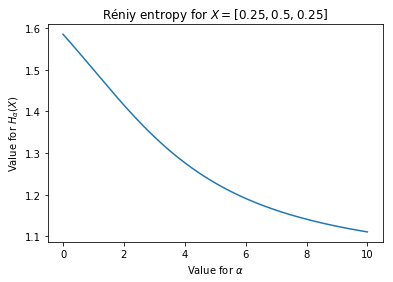

In [72]:
plot_renyi_entropy(alphas, X1)

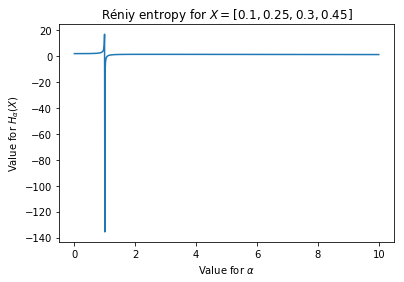

In [73]:
plot_renyi_entropy(alphas, X2)

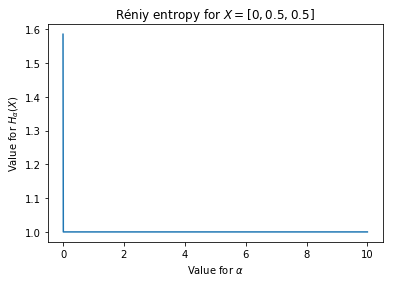

In [74]:
plot_renyi_entropy(alphas, X3)

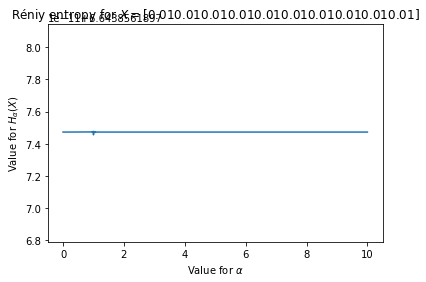

In [75]:
plot_renyi_entropy(alphas, X4)

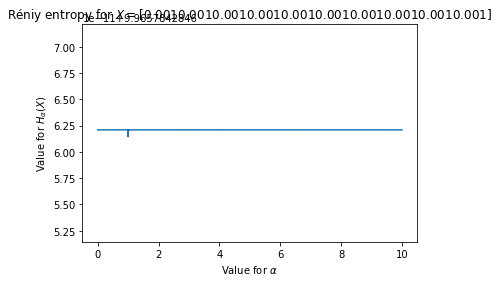

In [76]:
plot_renyi_entropy(alphas, X5)

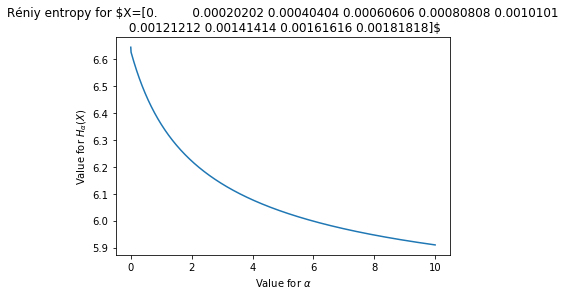

In [77]:
plot_renyi_entropy(alphas, X6)

----
## Conclusion

It is not surprising that $H_{\alpha}(X)$ appears to be continuous as a function of $\alpha$, as one can easily verify that it is.